In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras

# 신경망 모델 훈련

**[핵심키워드]** 손실곡선, 드롭아웃(dropout), 콜백(callback), 조기종료  

- 인공신경망 모델을 훈련하는 모범 사례와 필요한 도구 학습

### 데이터 준비

In [5]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [14]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

# 데이터 정규화(Min_Max Scale)
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

x_tr, x_val, y_tr, y_val= train_test_split(train_input, train_target, test_size=0.2,
                                                  random_state=42)

In [7]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal'
                ,'Shirt','Sneaker','Bag','Ankleboot']

### 모델 생성 함수 정의

: 함수의 a_layer 매개변수는 케라스 층으로서, 은닉층 뒤에 층을 추가하는 함수

In [8]:
from keras import Sequential
from keras.layers import Dense, Flatten

def build_model(a_layer= None):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation= 'softmax'))
    return model

In [16]:
from keras.layers import Input

def build_model2(a_layer= None):
    model = Sequential()
    model.add(Input(shape=(28*28,)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation= 'softmax'))
    return model

### 모델 생성하고 모델의 정보 출력

In [13]:
model = build_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model2 = build_model2()
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 28, 100)             │           2,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 28, 10)              │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,910 (15.27 KB)

 Trainable params: 3,910 (15.27 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일 및 훈련
: 훈련된 모델 객체를 변수 history에 저장  

In [18]:
model.compile(loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(x_tr, y_tr, epochs= 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6275 - loss: 13.4788
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7085 - loss: 0.8614
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7263 - loss: 0.8325
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7397 - loss: 0.7839
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7492 - loss: 0.8094


- history 객체는 딕셔너리 형식으로 훈련 측정값이 저장되어 있음
    - loss와 accuracy : 에포크마다 계산한 값이 순서대로 리스트에 저장

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [23]:
history.history['loss']

[3.8047308921813965,
 0.8578191995620728,
 0.8271805047988892,
 0.8038275837898254,
 0.7907363176345825]

## 손실 곡선

### history 속성에 포함된 손실(loss)과 정확도(accuracy) 시각화

In [41]:
def draw_metric_plot(history):
    plt.figure(figsize=(10,5))
    n = len(history.history['loss'])
    for i, item in enumerate(history.history.keys()):
        plt.subplot(1,2, i+1)
        plt.plot(history.history[item], label=item)
        plt.xlabel('epochs')
        plt.ylabel(item)
        # plt.xticks(range(n+1))
        plt.title(item + ' plot')
    plt.legend()    
    plt.show()

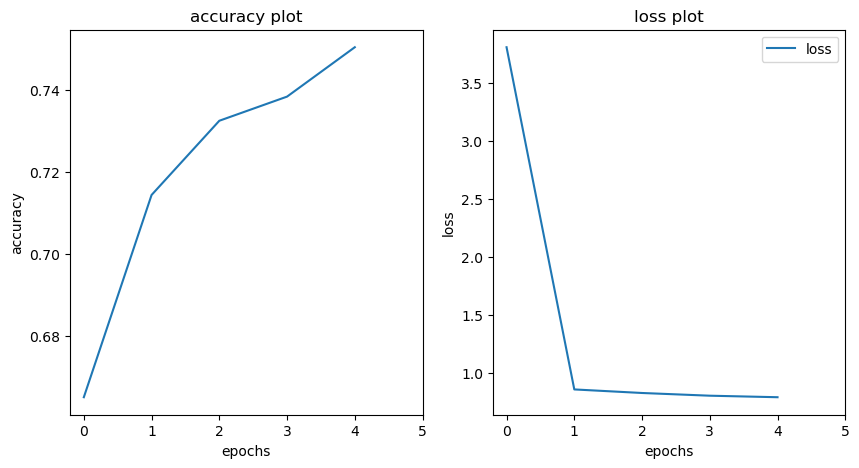

In [39]:
draw_metric_plot(history)

### epochs=20 인 경우 모델 훈련 후 loss 값 시각화

C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7514 - loss: 0.7738
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7614 - loss: 0.7771
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7746 - loss: 0.7615
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7893 - loss: 0.7066
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7972 - loss: 0.7171
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8059 - loss: 0.6956
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8048 - loss: 0.7017
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8039 - loss: 0.7140
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8068 - loss: 0.6890
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8098 - loss: 0.6918
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8120 - loss: 0.6695
Epoch 12/20
1500/1500 ━━━━━

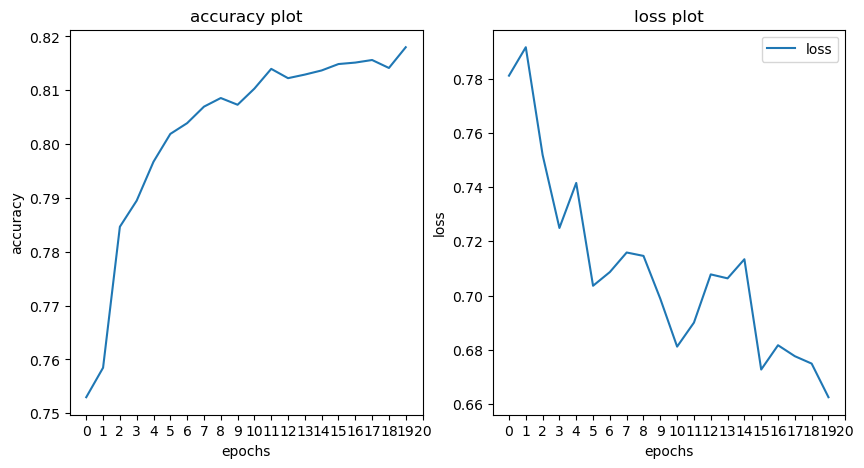

In [40]:
model3 = build_model()
model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model3.fit(x_tr, y_tr, epochs=20)
draw_metric_plot(history2)

#### [문제1] epochs=40으로 학습한 경우 accuracy 값을 그래프로 그려보시오

C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6356 - loss: 14.2716
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7399 - loss: 0.8799
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7583 - loss: 0.7904
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7696 - loss: 0.7816
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7777 - loss: 0.7544
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7866 - loss: 0.7293
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7861 - loss: 0.7315
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7935 - loss: 0.7338
Epoch 9/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7955 - loss: 0.7217
Epoch 10/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7969 - loss: 0.7222
Epoch 11/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8008 - loss: 0.7146
Epoch 12/40
1500/1500 ━━

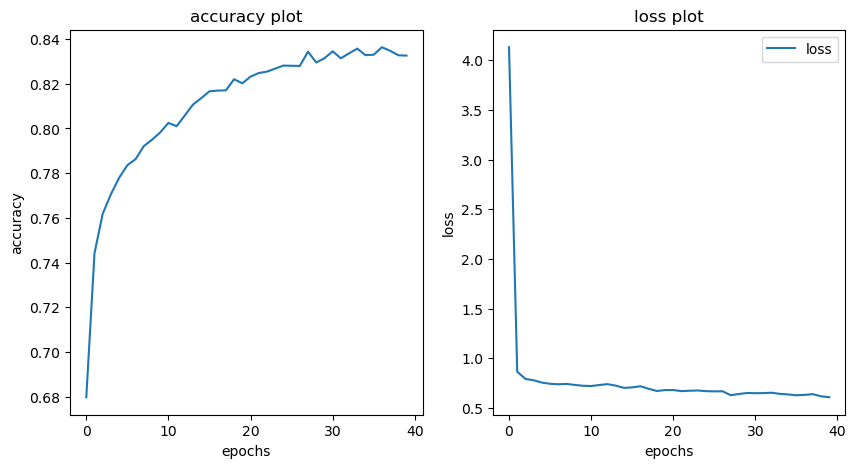

In [66]:
model4 = build_model()
model4.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model4.fit(x_tr, y_tr, epochs=40)
draw_metric_plot(history3)

## 검증 손실

- 에포크에 따라 과대적합과 과소적합이 달라짐
- 인공신경망 모델이 최적화하는 대상을 정확도가 아니라 손실함수
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음
    - 모델이 잘 훈련되었는지 판단하기 위해서는 정확도보다는 손실함수의 값을 확인

#### 에포크마다 검증 손실 계산
- fit() 메서드의 **validation_data** 매개변수에 검증 데이터를 전달
- 검증할 입력과 타깃값은 튜플로 전달

In [43]:
epochs = 20
model5 = build_model()
model5.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history4 = model5.fit(x_tr, y_tr, epochs= epochs, verbose=0, validation_data=(x_val, y_val))
history4.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### 검증데이터에 대한 손실과 정확도는 val_loss, val_accuracy에 저장

In [65]:
for key, value in history4.history.items():
    print(f'{key}: {history4.history[key][-1]}')    

accuracy: 0.817354142665863
loss: 0.6482558250427246
val_accuracy: 0.8053333163261414
val_loss: 1.3657710552215576


#### 훈련데이터와 검증데이터에 대한 손실과 정확도 시각화

In [60]:
def draw_metric_plot2(history):
    loss = ['loss','val_loss']
    acc = ['accuracy','val_accuracy']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,4))
    
    for i, item in enumerate([loss, acc]):
        n = len(history.history[item[0]])
        plt.subplot(1,2, i+1)
        plt.plot(history.history[item[0]], label= 'train')
        plt.plot(history.history[item[1]], label= 'validation')
        plt.xlabel('epochs')
        plt.ylabel(title[i])
        plt.xticks(range(n), range(1, n+1))
        plt.title(title[i] + ' plot')
        plt.legend()    
        plt.tight_layout()
        plt.grid()
    plt.show()

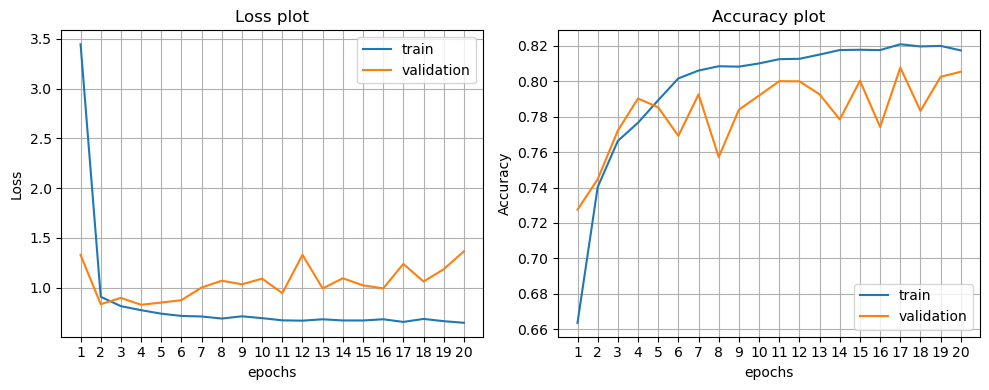

In [61]:
draw_metric_plot2(history4)

#### Adam 옵티마이저를 이용한 모델의 훈련 손실과 검증 손실

C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6599 - loss: 13.7843 - val_accuracy: 0.6712 - val_loss: 0.9561
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7072 - loss: 0.8703 - val_accuracy: 0.7368 - val_loss: 0.7930
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7564 - loss: 0.6871 - val_accuracy: 0.7694 - val_loss: 0.6687
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7811 - loss: 0.6136 - val_accuracy: 0.7853 - val_loss: 0.6069
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7897 - loss: 0.5870 - val_accuracy: 0.7977 - val_loss: 0.5953
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7969 - loss: 0.5745 - val_accuracy: 0.8014 - val_loss: 0.5690
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8177 - loss: 0.5279 - val_accuracy: 0.8015 - val_loss: 0.5957
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8273 - loss: 0.5103

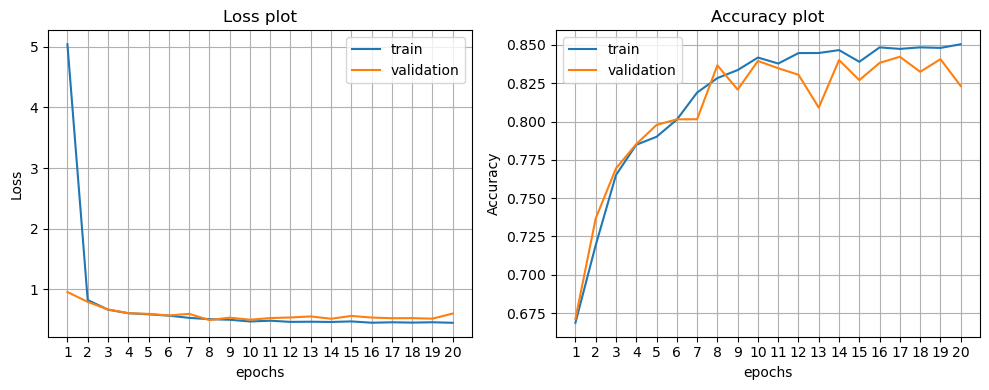

In [62]:
epochs = 20
model6 = build_model()
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history5 = model6.fit(x_tr, y_tr, epochs= epochs, validation_data=(x_val, y_val))
draw_metric_plot2(history5)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6311 - loss: 9.9963 - val_accuracy: 0.7141 - val_loss: 0.8742
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7213 - loss: 0.8738 - val_accuracy: 0.7495 - val_loss: 0.8950
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7473 - loss: 0.8185 - val_accuracy: 0.7492 - val_loss: 0.9235
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7882 - loss: 0.7241 - val_accuracy: 0.7638 - val_loss: 0.8853
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7960 - loss: 0.7158 - val_accuracy: 0.7925 - val_loss: 0.8312
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8062 - loss: 0.6956 - val_accuracy: 0.7904 - val_loss: 0.8376
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8091 - loss: 0.6701 - val_accuracy: 0.7894 - val_loss: 0.8631
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8106 - loss: 0.68

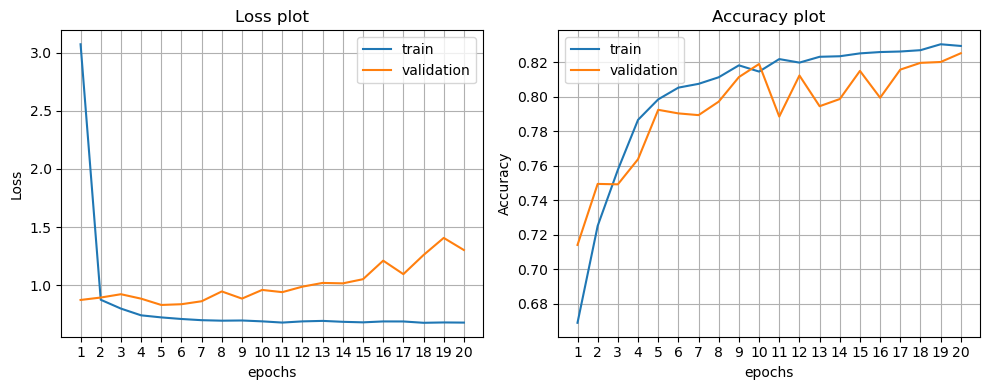

In [67]:
epochs = 20
model7 = build_model()
model7.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history6 = model7.fit(x_tr, y_tr, epochs= epochs, validation_data=(x_val, y_val))
draw_metric_plot2(history6)

#### [문제2] 앞의 신경망 모델에 대하여 학습률을 조정하여 변화되는 손실 곡선을 그려보시오.

Epoch 1/20


C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6812 - loss: 14.9957 - val_accuracy: 0.7260 - val_loss: 1.0932
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7470 - loss: 0.8540 - val_accuracy: 0.7652 - val_loss: 0.7068
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7792 - loss: 0.6291 - val_accuracy: 0.7813 - val_loss: 0.6479
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7972 - loss: 0.5770 - val_accuracy: 0.7958 - val_loss: 0.5821
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8175 - loss: 0.5160 - val_accuracy: 0.8130 - val_loss: 0.5529
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8260 - loss: 0.4896 - val_accuracy: 0.8239 - val_loss: 0.4998
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8331 - loss: 0.4639 - val_accuracy: 0.8242 - val_loss: 0.5338
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8429 - loss: 0.4474 - val_ac

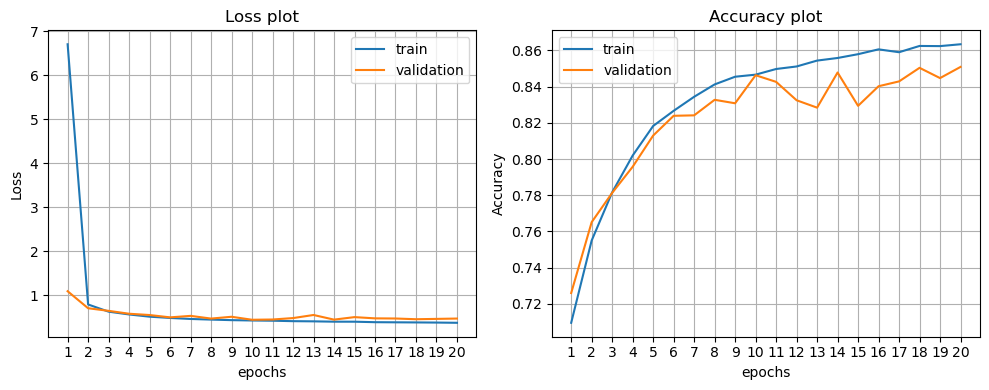

In [68]:
epochs = 20
model8 = build_model()
adam = keras.optimizers.Adam(learning_rate=0.0005)
model8.compile(optimizer= adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history7 = model8.fit(x_tr, y_tr, epochs= epochs, validation_data=(x_val, y_val))
draw_metric_plot2(history7)

---

## 드롭아웃(dropout)

: 딥러닝의 아버지로 불리는 제프리 힌턴(Geoffrey  Hinton)이 소개한 개념
- 은닉층에서 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
- 훈련 중에 적용되며 평가나 예측에서는 적용되지 않음
- 텐서플로는 이를 자동으로 처리

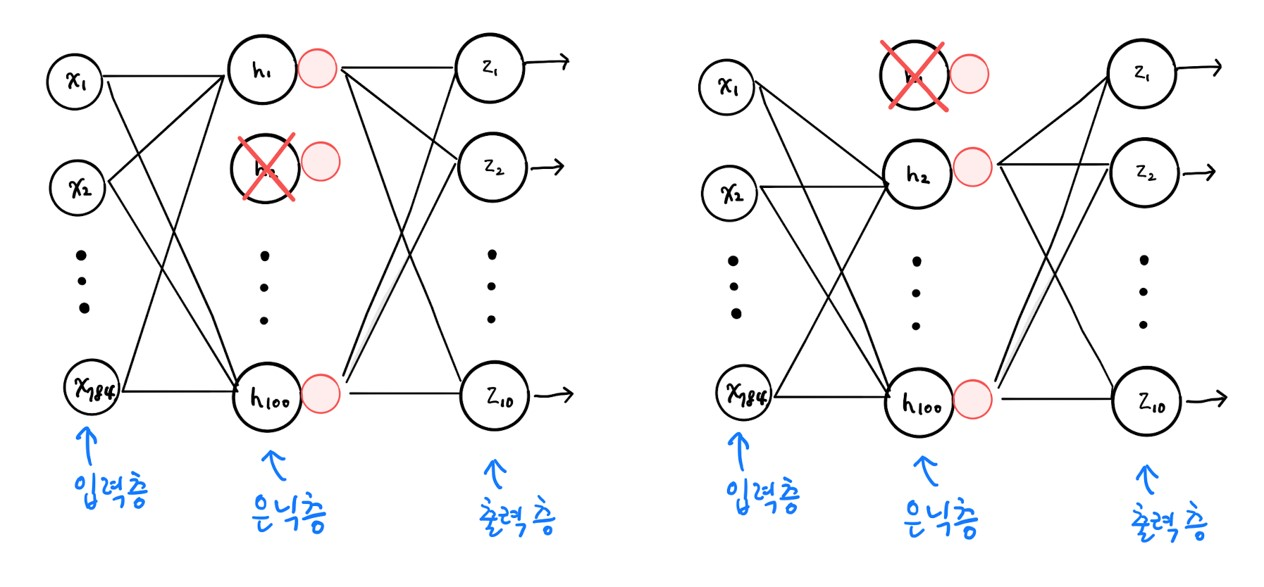

#### 드롭아웃이 과대적합을 막는 이유?

- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함 

#### Dropout 클래스

- keras.layres 패키지 아래 제공
    - keras.layers.Dropout(드롭아웃비율)  
    - 드롭아웃하지 않는 뉴런의 출력은 $1/(1-r)$ 만큼 증가시켜 출력의 총합이 같도록 만듬

- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬

In [69]:
# 30% 정도 드롭아웃

model9= build_model(keras.layers.Dropout(0.3))
model9.summary()

C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

#### 드롭아웃이 적용된 모델의 훈련 손실과 검증 손실 그래프

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4098 - loss: 8.5587 - val_accuracy: 0.5526 - val_loss: 1.2019
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4921 - loss: 1.3480 - val_accuracy: 0.5810 - val_loss: 1.0346
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5298 - loss: 1.2070 - val_accuracy: 0.6108 - val_loss: 0.9483
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5482 - loss: 1.1334 - val_accuracy: 0.6323 - val_loss: 0.8966
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5659 - loss: 1.0737 - val_accuracy: 0.6423 - val_loss: 0.8817
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5736 - loss: 1.0588 - val_accuracy: 0.6161 - val_loss: 0.9353
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5775 - loss: 1.0476 - val_accuracy: 0.6276 - val_loss: 0.8635
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5814 - loss: 1.038

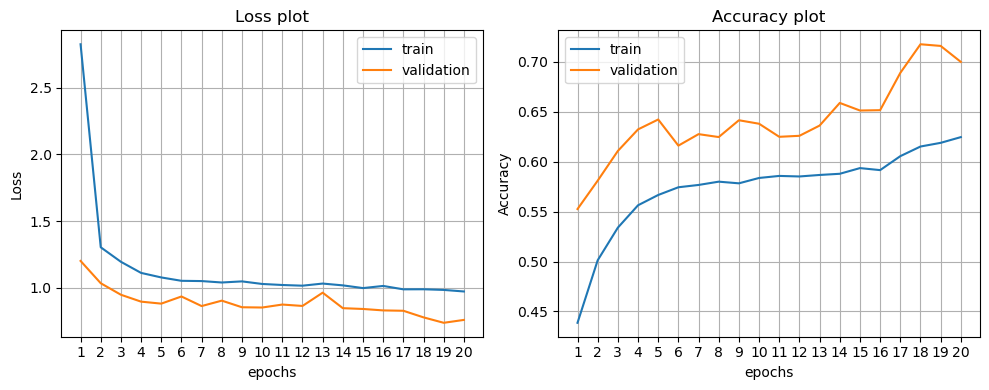

accuracy= 0.6246, loss= 0.9729, val_accuracy= 0.6999, val_loss= 0.7596, 


In [72]:
epochs = 20
model9.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history8 = model9.fit(x_tr, y_tr, epochs= epochs, validation_data= (x_val, y_val))
draw_metric_plot2(history8)
keys = ['accuracy','loss','val_accuracy','val_loss']
for key in keys:
    print(f'{key}= {history8.history[key][-1]:.4f}', end=', ')
print()

In [83]:
historys = [history5, history6, history7, history8] 
keys = ['accuracy','loss','val_accuracy','val_loss']
for i, histo in enumerate(historys):
    print(f'history {i+5}')
    for key in keys:
        print(f'{key}= {histo.history[key][-1]:.4f}', end=', ')
    print()

history 5
accuracy= 0.8504, loss= 0.4482, val_accuracy= 0.8232, val_loss= 0.6011, 
history 6
accuracy= 0.8296, loss= 0.6796, val_accuracy= 0.8253, val_loss= 1.3033, 
history 7
accuracy= 0.8634, loss= 0.3766, val_accuracy= 0.8509, val_loss= 0.4730, 
history 8
accuracy= 0.6246, loss= 0.9729, val_accuracy= 0.6999, val_loss= 0.7596, 


In [ ]:
# epochs= 5
- accuracy: 0.7492 - loss: 0.8094

# epochs= 40
- accuracy: 0.8315 - loss: 0.5868

# epochs= 20
- accuracy: 0.8173 - loss: 0.6482 - val_accuracy: 0.8053 - val_loss: 1.3657

# epochs= 20, optimizer= 'adam'
- accuracy: 0.8551 - loss: 0.4287 - val_accuracy: 0.8232 - val_loss: 0.6011
    
# epochs= 20, optimizer= 'RMSprop'
- accuracy: 0.8299 - loss: 0.6980 - val_accuracy: 0.8253 - val_loss: 1.3033
 
# epochs= 20, optimizer= 'adam(learning_rate=0.0005)'
- accuracy: 0.8618 - loss: 0.3799 - val_accuracy: 0.8509 - val_loss: 0.4730

# epochs= 20, optimizer= 'adam', Dropout
- accuracy= 0.6246, loss= 0.9729, val_accuracy= 0.6999, val_loss= 0.7596

## 모델 저장과 복원

#### 에포크 횟수를 10으로 지정하고 모델을 훈련

In [84]:
epochs = 10
model10= build_model(keras.layers.Dropout(0.3))
model10.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history9 = model10.fit(x_tr, y_tr, epochs= epochs, validation_data= (x_val, y_val))

C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.3591 - loss: 8.9322 - val_accuracy: 0.5378 - val_loss: 1.2414
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.4789 - loss: 1.3621 - val_accuracy: 0.6448 - val_loss: 0.9662
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5525 - loss: 1.1606 - val_accuracy: 0.6728 - val_loss: 0.8823
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5765 - loss: 1.1006 - val_accuracy: 0.6917 - val_loss: 0.8053
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6025 - loss: 1.0285 - val_accuracy: 0.7157 - val_loss: 0.7440
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6195 - loss: 0.9864 - val_accuracy: 0.6984 - val_loss: 0.7743
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6279 - loss: 0.9660 - val_accuracy: 0.6628 - val_loss: 0.8544
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6185 - loss: 0

In [86]:
def print_metric_and_plot(history, title):
    histo = history
    draw_metric_plot2(histo)
    keys = ['accuracy','loss','val_accuracy','val_loss']
    print(title)
    for key in keys:
        print(f'{key}= {histo.history[key][-1]:.4f}', end=', ')
    print()

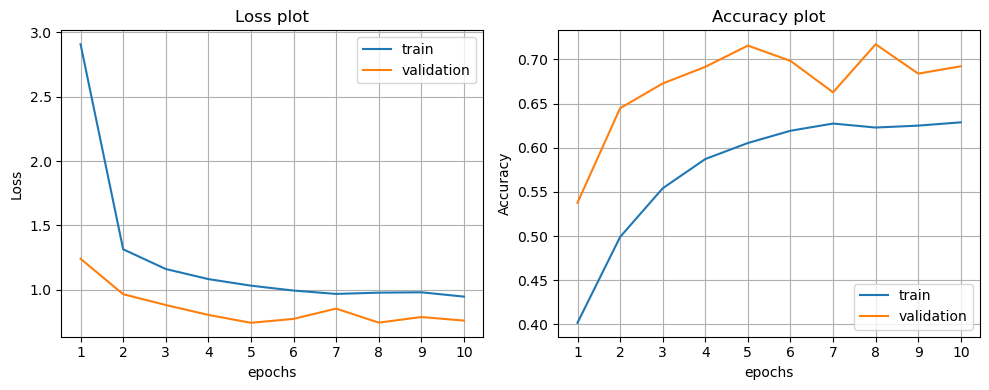

-- epoch=10, optimizer=Adam, Dropout=0.3 --
accuracy= 0.6288, loss= 0.9473, val_accuracy= 0.6923, val_loss= 0.7612, 


In [87]:
title = '-- epoch=10, optimizer=Adam, Dropout=0.3 --'
print_metric_and_plot(history9, title)

#### 훈련된 모델의 파라미터를 저장 : save_weights() 메서드  
- 텐서플로의 체크포인트 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [107]:
model_path = 'C:\\workspace_multi07\\web\\13_deep learning\\'
model10.save_weights(model_path + 'FMnist_model01.weights.h5')

In [ ]:
%cd \workspace_multi07\web\13_deep learning\

#### 훈련된 모델 구조와 파라미터를 함께 저장 : model.save() 메서드   

- 텐서플로의 SavedModel 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [109]:
model10.save(model_path + 'FMnist_model_whole.h5')

#### 저장된 파일들 확인

In [110]:
%ls

 C 드라이브의 볼륨: C드라이브
 볼륨 일련 번호: 8E15-BB69

 C:\workspace_multi07\web\13_deep learning 디렉터리

2024-06-13  오후 02:34    <DIR>          .
2024-06-13  오후 02:34    <DIR>          ..
2024-06-13  오전 10:36    <DIR>          .ipynb_checkpoints
2024-06-13  오후 02:34           974,600 FMnist_model_whole.h5
2024-06-13  오후 02:33           971,928 FMnist_model01.weights.h5
2024-06-12  오후 01:53         1,221,852 딥러닝01_2_딥러닝과 퍼셉트론_실습.ipynb
2024-06-12  오후 03:32           939,572 딥러닝02_1_데이터표현과 텐서연산.ipynb
2024-06-12  오후 05:03           148,698 딥러닝02_2_텐서플로와케라스.ipynb
2024-06-13  오전 10:36           464,585 딥러닝03_첫번째신경망DNN.ipynb
2024-06-13  오후 02:33         1,054,424 딥러닝04_신경망모델훈련.ipynb
2024-06-13  오전 09:13            22,037 딥러닝05_신경망분류문제1_IMDB리뷰분류.ipynb
2024-06-13  오전 09:13            22,921 딥러닝05_신경망분류문제2_뉴스기사분류.ipynb
2024-06-13  오전 09:13            16,573 딥러닝06_신경망회귀문제_주택가격예측.ipynb
              10개 파일           5,837,190 바이트
               3개 디렉터리  79,738,347,520 바이트 남음


#### 새로운 모델에 저장된 훈련모델 가중치를 적용하여 훈련

- load_weights(모델파라미터저장파일명) 메서드

- save_weights()로 저장된 모델과 정확히 같은 구조를 가져야 함

In [111]:
model11 =build_model(keras.layers.Dropout(0.3))
model11.load_weights(model_path + 'FMnist_model01.weights.h5')

C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### 모델의 검증 정확도 확인

In [118]:
# predict -> predict_proba처럼 확률형태로 나온다
var_proba = model11.predict(x_val)
var_proba[:10]

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


array([[7.6820156e-12, 0.0000000e+00, 4.3000548e-21, 3.8910338e-21,
        5.6294922e-18, 6.1260835e-05, 1.7457493e-14, 3.3119710e-03,
        9.9662685e-01, 4.8085303e-12],
       [1.4319752e-11, 0.0000000e+00, 6.9692319e-20, 1.0674542e-20,
        3.0777885e-17, 5.2903342e-05, 5.6303249e-14, 4.2768670e-03,
        9.9567020e-01, 3.5242850e-12],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.0396826e-05, 0.0000000e+00, 9.9994838e-01,
        3.1380655e-22, 1.1845508e-06],
       [8.6326659e-02, 1.0780148e-02, 2.7140176e-01, 7.9197653e-02,
        2.6929629e-01, 1.0495821e-02, 2.1338341e-01, 1.1806995e-02,
        4.0742189e-02, 6.5691569e-03],
       [3.4603703e-13, 0.0000000e+00, 4.1614996e-24, 1.5532668e-23,
        2.4875866e-20, 2.9559869e-05, 2.6068739e-16, 1.7546427e-03,
        9.9821579e-01, 5.3089797e-13],
       [8.6326659e-02, 1.0780148e-02, 2.7140176e-01, 7.9197653e-02,
        2.6929629e-01, 1.0495821e-02, 2.1338341e-01, 1.18

In [116]:
var_labels = np.argmax(val_proba, axis= -1)
var_labels[:10]

array([8, 8, 7, 2, 8, 2, 1, 6, 2, 5], dtype=int64)

In [126]:
predict_target_names = [target_names[i] for i in var_labels[:10]]
print(predict_target_names)

['Bag', 'Bag', 'Sneaker', 'Pullover', 'Bag', 'Pullover', 'Trouser', 'Shirt', 'Pullover', 'Sandal']


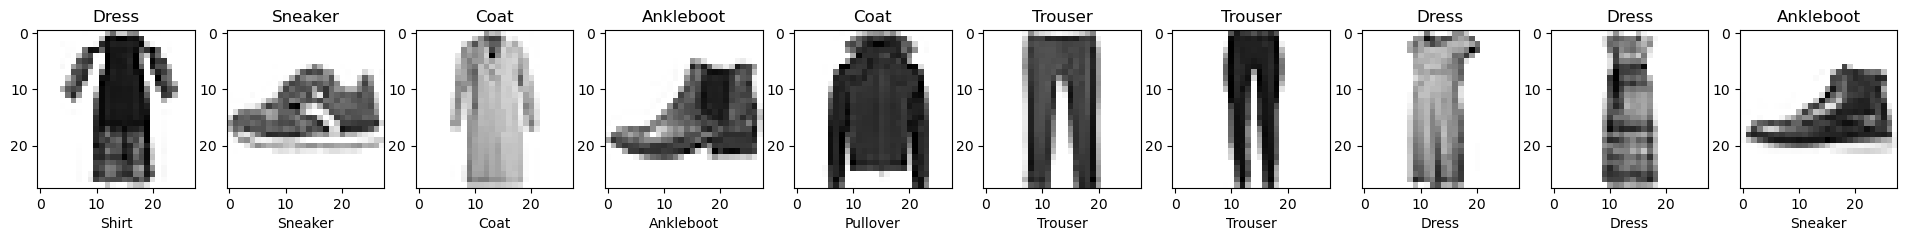

In [129]:
fig, ax = plt.subplots(figsize=(24,10), nrows=1, ncols=10)
for i in range(10):
    img = x_val[i+10]
    label = y_val[i+10]
    pred = var_labels[i+10]
    ax[i].imshow(img, cmap= plt.cm.binary)
    ax[i].set_title(target_names[label])
    ax[i].set_xlabel(target_names[pred])

#### 모델 전체 파일을 읽은 후 검증 세트의 정확도 출력

- 모델 저장 파일 읽기 : load_model(파일명)
    - load_model() 함수는 모델 파라미터와 모델 구조, 옵티마이저 상태까지 모두 복원
    - evaluate() 메서드 사용 가능

In [130]:
model12= keras.models.load_model(model_path + 'FMnist_model_whole.h5')

In [131]:
model.evaluate(x_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8009 - loss: 1.1328


[1.3743191957473755, 0.7975000143051147]

In [132]:
val_proba = model12.predict(x_val)
np.argmax(val_proba, axis= -1)[:10]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([8, 8, 7, 2, 8, 2, 1, 6, 2, 5], dtype=int64)

## 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있도록 도와주는 객체
- 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지 않으면 종료
- keras.callbacks 패키지에 있는 클래스들
- 생성한 콜백객체들은 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달

### ModelCheckpoint 콜백
- 최상의 검증 점수를 만드는 모델 저장 


- keras.callbacks.ModelCheckpoint 클래스
    - 생성자의 인수로 저장할 파일이름 지정
    
    
- 형식 : keras.callbacks.ModelCheckpoint('파일이름', monitor='val_loss', save_weight_only=True)
    - monitor='val_loss' : 검증 손실을 관찰
    - save_weight_only : 
         - True인 경우 모델의 가중치와 절편만 저장
         - False인 경우 전체 모델을 저장

In [134]:
from keras.callbacks import ModelCheckpoint

model13 = build_model(keras.layers.Dropout(0.3))
model13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpt_cb = ModelCheckpoint(filepath = 'checkpoint_path.keras', monitor= 'val_loss',
                            save_best_only= True)
model13.fit(x_tr, y_tr, epochs=20, validation_data= (x_val, y_val),
           callbacks= [checkpt_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4642 - loss: 9.8381 - val_accuracy: 0.6017 - val_loss: 1.1052
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5385 - loss: 1.2498 - val_accuracy: 0.5993 - val_loss: 1.0392
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5642 - loss: 1.1765 - val_accuracy: 0.6787 - val_loss: 0.8747
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5840 - loss: 1.0878 - val_accuracy: 0.6758 - val_loss: 0.8312
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5903 - loss: 1.0558 - val_accuracy: 0.6870 - val_loss: 0.7952
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6134 - loss: 1.0126 - val_accuracy: 0.6996 - val_loss: 0.7601
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.6138 - loss: 1.0133 - val_accuracy: 0.7139 - val_loss: 0.7430
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6236 - loss:

####  저장된 최상의 검증 점수를 낸 모델을 다시 읽어 예측하기

In [135]:
model_path = 'C:\\workspace_multi07\\web\\13_deep learning\\'
model_13 = keras.models.load_model(model_path + 'checkpoint_path.keras')
model_13.evaluate(x_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7286 - loss: 0.6766


[0.6781495809555054, 0.7283333539962769]

### 조기 종료 콜백 : EearlyStopping

- 과대적합이 되기 전에 훈련을 미지 중지하는 것
    - 검증점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법
- 계산 비용과 시간 절약
- 훈련 에포크 횟수를 제한하는 역할로 과대적합을 예방 -> 규제 방법 중 하나


- 형식 : keras.callbacks.EarlyStopping(monitor='val_loss', patient, restore_best_weights=False)
    - patience : 검증 점수가 향상되지 않더라도 지속할 수 있는 최대 에포크 횟수
    - restore_best_weights : 최상의 모델 가중치를 복원할지 지정
        - True 인 경우 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
        - 기본값은 False

#### EarlyStopping 콜백과 ModelCheckpoint 콜백을 사용한 모델

In [137]:
from keras.callbacks import EarlyStopping

model14 = build_model(keras.layers.Dropout(0.3))
model14.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpt_cp = ModelCheckpoint(filepath = 'checkpoint_path.keras', monitor= 'val_loss',
                            save_best_only= True)

early_cp = EarlyStopping(patience= 2, restore_best_weights= True)

history14 = model14.fit(x_tr, y_tr, epochs=20, validation_data= (x_val, y_val),
           callbacks= [checkpt_cp, early_cp])

C:\Users\gillhk\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4832 - loss: 10.2162 - val_accuracy: 0.6365 - val_loss: 1.0117
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.5820 - loss: 1.1471 - val_accuracy: 0.7007 - val_loss: 0.8345
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5805 - loss: 1.1199 - val_accuracy: 0.7038 - val_loss: 0.7731
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6089 - loss: 1.0153 - val_accuracy: 0.7069 - val_loss: 0.7678
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6185 - loss: 0.9951 - val_accuracy: 0.6960 - val_loss: 0.7870
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6348 - loss: 0.9611 - val_accuracy: 0.7155 - val_loss: 0.7294
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6460 - loss: 0.9381 - val_accuracy: 0.6852 - val_loss: 0.8221
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6389 - loss

#### 콜백 객체의 속성 확인

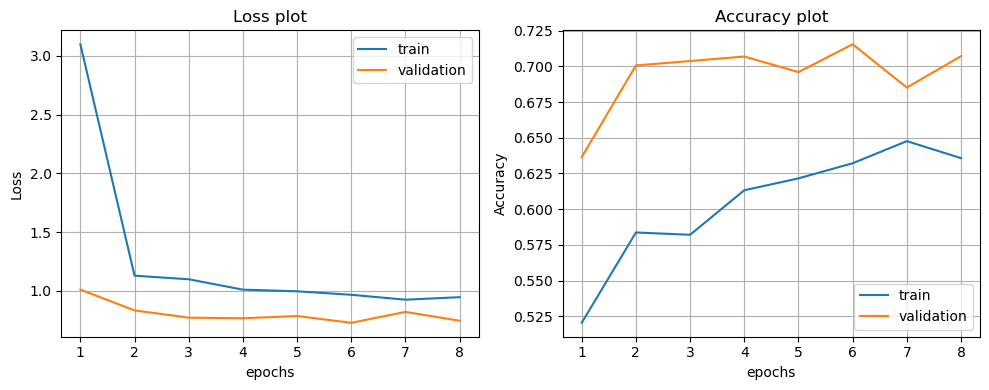

In [138]:
draw_metric_plot2(history14)

In [139]:
early_cp.stopped_epoch

7

- 조기종료를 통해 안심하고 에포크 횟수를 크게하여 학습을 진행할 수 있고, ModelCheckPoint 콜백을 통해 최상의 모델을 자동으로 저장해주어 편리함

#### 조기 종료로 얻은 모델을 사용하여 검증 세트의 성능 확인

In [141]:
model14.evaluate(x_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7138 - loss: 0.7338


[0.7294052839279175, 0.715499997138977]

---

### 확인문제

1. 케라스 모델의 fit() 메서드에 검증 세트를 올바르게 전달하는 코드는 무엇인가?  

    ① model.fit(... , val_input=val_input, val_target=val_target)       
    ② model.fit(... , validation_input=val_input, validation_target=val_target)       
    ③ model.fit(... , val_data=(val_input, val_target))  
    ④ model.fit(... , validation_data=(val_input, val_target))       

2. 이전 층의 뉴런 출력 중 70%만 사용하기 위해 드롭아웃 층을 추가하려고 한다. 옳게 설정한 것은?

    ① Dropout(0.7)    
    ② Dropout(0.3)  
    ③ Dropout(1/0.7)  
    ④ Dropout(1/0.3)

3. 케라스 모델의 가중치만 저장하는 메서드는 무엇인가?

    ① save()    
    ② load_model()  
    ③ save_weights()  
    ④ load_weights()      

4. 케라스의 조기 종료 콜백을 사용하려고 한다. 3번의 에포크 동안 손실이 감소되지 않으면 종료하고 최상의 모델 가중치를 복원하도록 설정한 것은 무엇인가?

    ① EarlyStopping(monitor='loss', patience=3)  
    ② EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
    ③ EarlyStopping(monitor='accuracy', patience=3)  
    ④ EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)  

### [마무리]

- 드롭아웃(Dropout) 
- 콜백(Callback)
- 조기종료

### [핵심패키지와 함수]

**TensorFlow**

- Dropout : 드롭아웃 층
- save_weights() : 모든 층의 가중치와 절편을 파일에 저장
- load_weights() : save_weights()로 저장된 파일 읽기
- save() : 모델 구조와 모든 가중치와 절편을 파일에 저장
- load_model() : model.save()로 저장된 모델 로드
- ModelCheckpoint : 케라스 모델과 가중치를 일정 간격으로 저장
- EarlyStopping :관심 지표가 더 이상 향상하지 않으면 훈련을 중지

**Numpy**
- agrmax : 배열에서 축을 따라 최대값의 인덱스 반환